In [33]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import xml2epub
import time

In [34]:
# URL da página que você deseja extrair dados
url = 'https://parahumans.wordpress.com/category/stories-arcs-1-10/arc-1-gestation/1-01/'

# Faz a requisição HTTP para a página
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida (status code 200)
if response.status_code == 200:
    # Cria o objeto BeautifulSoup para fazer o parsing do HTML
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print("Falha ao acessar a página:", response.status_code)

In [35]:
soup


<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en">
<![endif]-->
<!--[if !(IE 6) & !(IE 7) & !(IE 8)]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width" name="viewport"/>
<title>
1.01 | Worm	</title>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://s2.wp.com/wp-content/themes/pub/twentyeleven/style.css?ver=20190507" media="all" rel="stylesheet" type="text/css"/>
<link href="https://parahumans.wordpress.com/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
<script src="https://s2.wp.com/wp-content/themes/pub/twentyeleven/js/html5.js?ver=3.7.0" type="text/javascript"></script>
<![endif]-->
<meta content="max-image-preview:large" name="robots"/>
<link href="//s1.wp.com" rel="dns-prefetch">
<link href="//s0.wp.com" rel="dns-prefetch"/>
<link href="//s2.wp.com" rel="dns-prefetch"/>
<link href="https://pa

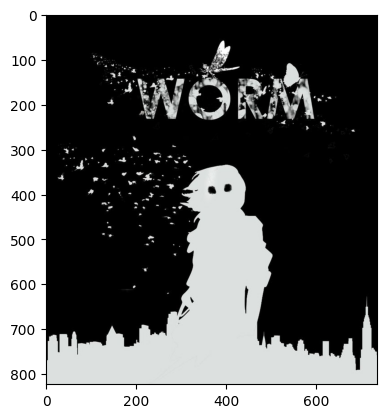

In [36]:
img = plt.imread('worm_cover.jpg')
plt.imshow(img)

In [37]:
ficTitle = "Worm"
ficAuthor = "Wildbow"

book = xml2epub.Epub(ficTitle,creator=ficAuthor, language='en')
## create your own book cover
coverChapter = xml2epub.create_chapter_from_string('./worm_cover.jpg', local=True, title='Cover', strict=False)
book.add_chapter(coverChapter)

In [38]:
chapterTitle = soup.find('h1', class_='entry-title')
chapterText = str(soup.find('div', class_='entry-content'))
chapterText = str(chapterTitle) + chapterText
chapterText

'<h1 class="entry-title"><a href="https://parahumans.wordpress.com/2011/06/11/1-1/" rel="bookmark">Gestation 1.1</a></h1><div class="entry-content">\n<p style="text-align:right;"><a href="https://parahumans.wordpress.com/2011/06/14/gestation-1-2/" title="Next Chapter">Next Chapter</a></p>\n<p dir="ltr"><em>Brief note from the author: \xa0This story isn’t intended for young or sensitive readers. \xa0Readers who are on the lookout for <a href="http://www.urbandictionary.com/define.php?term=Trigger%20warning&amp;defid=6195009">trigger warnings</a>\xa0are advised to give Worm a pass.</em></p>\n<p dir="ltr" style="text-align:center;">■</p>\n<p dir="ltr">Class ended in five minutes and all I could think was, <em>an hour is too long for lunch</em>.</p>\n<p>Since the start of the semester,\xa0I had been looking forward to the part of Mr. Gladly’s World Issues class where we’d start discussing capes. \xa0Now that it had finally arrived, I couldn’t focus. \xa0I fidgeted, my pen moving from hand 

In [39]:
## create first chapter
ficChapter = xml2epub.create_chapter_from_string(chapterText, url=url, title=chapterTitle.text, strict=False)
book.add_chapter(ficChapter)

In [40]:
def getNextChapter(soup) :
    nextUrl = soup.find('a', title='Next Chapter')["href"]

    # Faz a requisição HTTP para a página
    response = requests.get(nextUrl)

    # Verifica se a requisição foi bem-sucedida (status code 200)
    if response.status_code == 200:
        # Cria o objeto BeautifulSoup para fazer o parsing do HTML
        soup = BeautifulSoup(response.text, 'html.parser')
    else:
        print("Falha ao acessar a página:", response.status_code)
        
    return soup

In [41]:
for i in range(0, 29):
    try:
        soup = getNextChapter(soup)
    except:
        print("There is no next chapter")
        break
    chapterTitle = soup.find('h1', class_='entry-title')
    chapterText = str(soup.find('div', class_='entry-content'))
    chapterText = str(chapterTitle) + chapterText

    print (f"{i} - Found: {chapterTitle.text} ----- Adding Chapter...")
    ## create chapter
    ficChapter = xml2epub.create_chapter_from_string(chapterText, url=url, title=chapterTitle.text, strict=False)
    book.add_chapter(ficChapter)
    time.sleep(1)


0 - Found: Gestation 1.2 ----- Adding Chapter...
1 - Found: Gestation 1.3 ----- Adding Chapter...
2 - Found: Gestation 1.4 ----- Adding Chapter...
3 - Found: Gestation 1.5 ----- Adding Chapter...
4 - Found: Gestation 1.6 ----- Adding Chapter...
5 - Found: Interlude 1 ----- Adding Chapter...
6 - Found: Insinuation 2.1 ----- Adding Chapter...
7 - Found: Insinuation 2.2 ----- Adding Chapter...
8 - Found: Insinuation 2.3 ----- Adding Chapter...
9 - Found: Insinuation 2.4 ----- Adding Chapter...
10 - Found: Insinuation 2.5 ----- Adding Chapter...
11 - Found: Insinuation 2.6 ----- Adding Chapter...
12 - Found: Insinuation 2.7 ----- Adding Chapter...
13 - Found: Insinuation 2.8 ----- Adding Chapter...
14 - Found: Insinuation 2.9 ----- Adding Chapter...
15 - Found: Interlude 2 ----- Adding Chapter...
16 - Found: Agitation 3.1 ----- Adding Chapter...
17 - Found: Agitation 3.2 ----- Adding Chapter...
18 - Found: Agitation 3.3 ----- Adding Chapter...
19 - Found: Agitation 3.4 ----- Adding Chapter

In [43]:
book.create_epub('./books/')


'./books/Worm.epub'

: 